#ENSEMBLE METHODS
Machine Learning can be broadly classified into 3 types


*   SuperVised learning
*   UnSupervised learning
*   Reinforcement Learning

Supervised learning is a learning which tries to create a function of input based on a given data set.
Unsupervised learning makes an assumption and then tries to classify and cluster datapoints based on the assumption ->"grouping different types of people etc."
Reinforcement Learning consists of assigning a cost function which becomes higher if the model performs in the wrong way, where the goal is to minimise the cost function , therefore the model approaches the optimum case.


We will mainly be focusing on supervised learning here.
There are different sub-classes for supervised learning


1.   Regression
2.   Classification
3.  Decision Trees, again a classification problem but with only 2 outputs yes/no



---


For classification  of the given data accoridng to it's features we must use certain techniques which read the training data and create a model that works on the input data correctly with minimal error. However we must not get an overfit model as that is equivalent to just "mugging up " the training data set, but rather create a model which can compare the test data to the training data and extrapolate the desired output. 
The following techniques are used in classification problems of machine learning


*   Decision Trees
*   KNN
*   Ensemble Methods such as Bagging , Boosting etc.
*   Logistic Regression
*   Naive Bayes Method
*   Support Vector Machines




**CART Algorithm**
Stands for Classification and Regression Tree
Now our goal is to separate all the items based on certain features. But how do we know where to split the tree? We split the tree where the error is minimum.
There are many ways to estimate the purity of a certain node of a tree
.

They are


*   **Gini Impurity** - Measures the amount of uncertainty at a particular node, calculated by $1-Σ(p_{i})^2$  where $p_{i}$ is the probability of each parameter occuring at that particular node.
*   **Variance ~~Descent~~ decrease**- If data is less sparse or less scattered we choose that path,as the deviation from mean decreases.
*   **Information Gain** - Decrease in entropy after dataset is split based on an attribute . While constructing a decision tree our main goal to find an attribute that returns the highest info gain.
*   **Entropy** - Defines randomness in the data, metric which measures the impurity of in the first step to solve problems using ID3.
$$ 1-\Sigma(log(p_{i})) = e $$




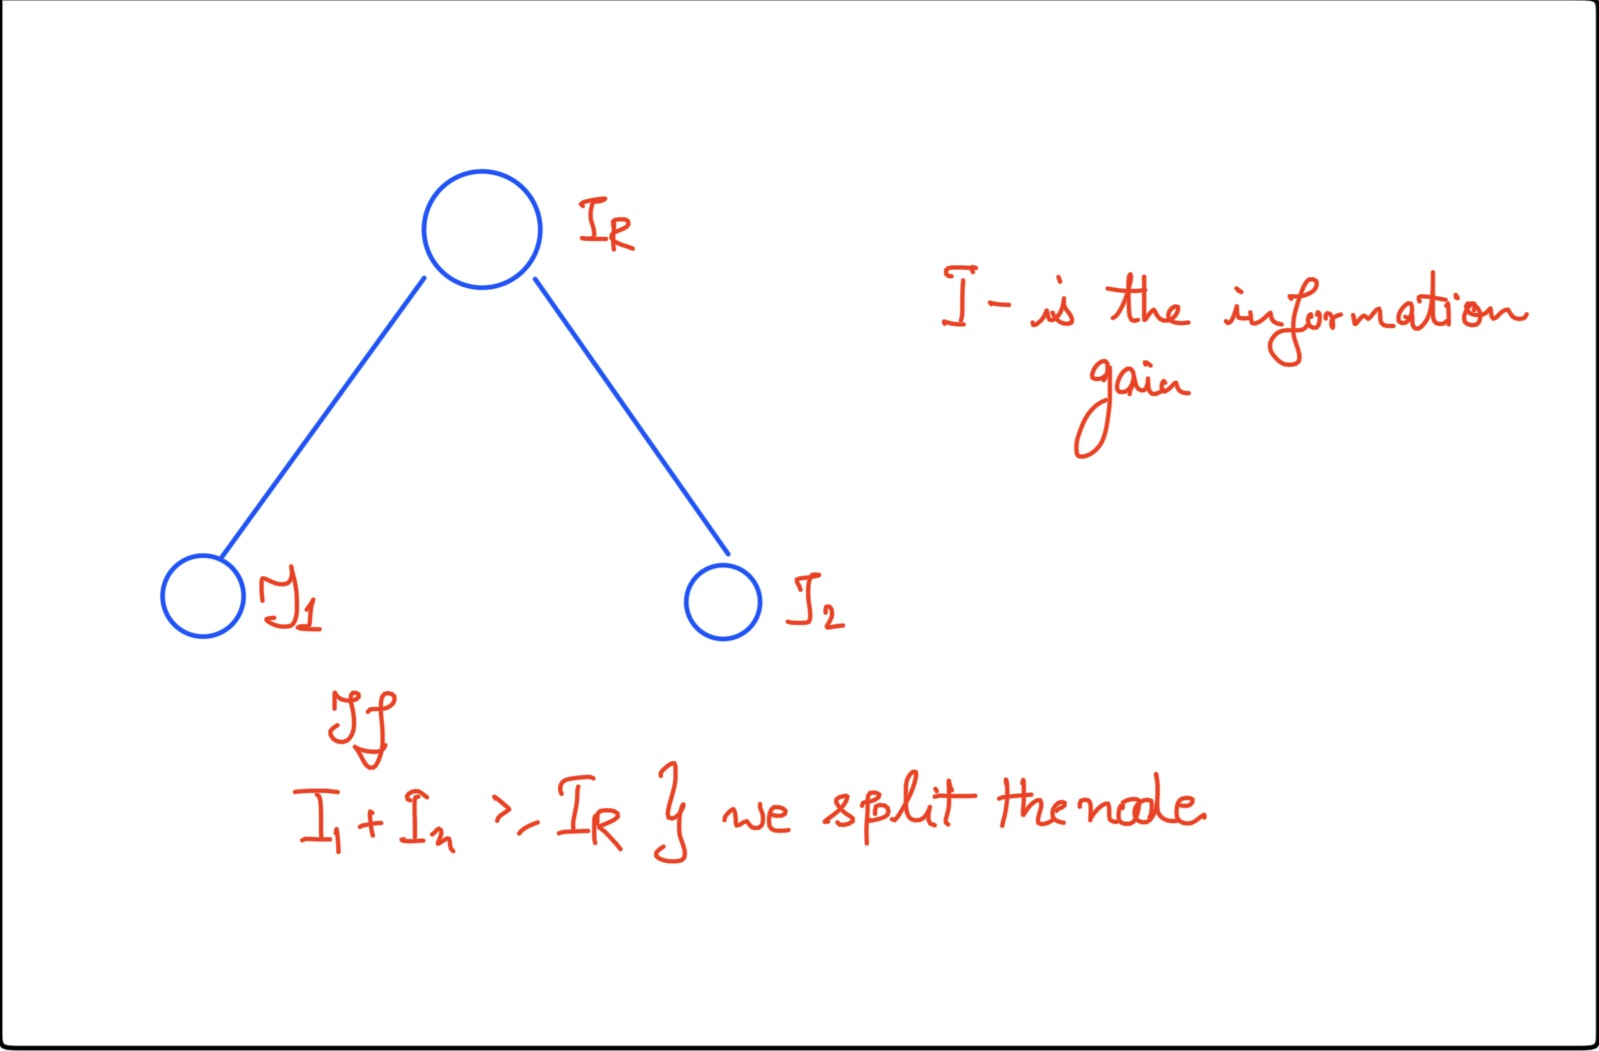

# Ensemble Methods



*   **BAGG**ing-

      **Random Forest**-Main focus as commonly used

      **Bagged Decision Trees**
*   **Boosting**-

  **Gradient Boosting**-the other two types are used more often

  **Ada Boost**-Canonical Boosting

  **XGBoost**-Stochastic Gradient Boosting

*   **Stacking**  



## Bagging 


>  BAGGing gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. Multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples. After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor.


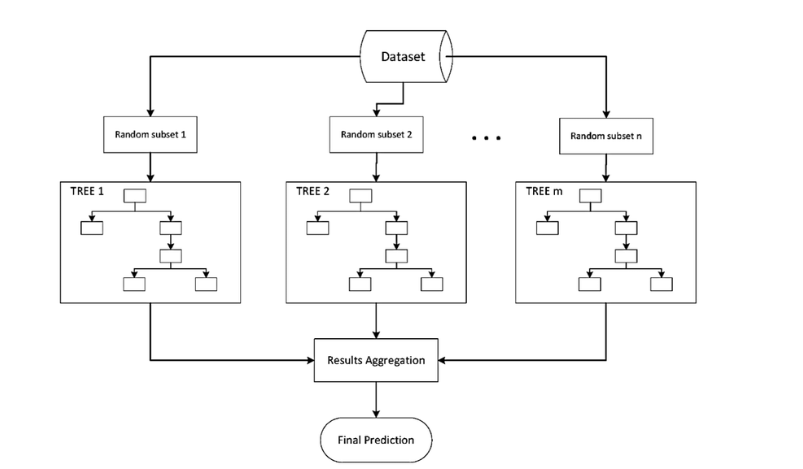

# Random Forest
Random Forest models decide where to split based on a random selection of features. Rather than splitting at similar features at each node throughout, Random Forest models implement a level of differentiation because each tree will split based on different features. This level of differentiation provides a greater ensemble to aggregate over,
Steps to implement a random forest ensembler.


*   ### **Step1**


> Create a boot-strapped data-set. So what is a boot-strapped data set?, so it is basically randomly choosing a set of elements from the original dataset with the same number of data points in the original data-set , where repetition is allowed . 


---
**Input** **Output** \\
    20        50    \\
    10        40    \\
    30        60    \\
    60        70    \\


---
A bootstrapped data set would be choosing 4 data points , where repetition of rows (here) is allowed, say the first row appears thrice and the third row appears once.



* ### **Step2** 


> Create a decision tree using the obtained bootstrapped data from step 1, randomly select only a subset of parameters which influence the output and not the entire parametric space. Now build a decision tree based on the methods yash has shown for each of them(although there are libraries which do that automatically for you(which is enough for most practical purposes) but it is good to know the actual working of the model in detail.)

**Repeat Step 1 and repeat for as many trees as you can, if possible all**

Now check where each test case decision will lead to in each tree ;
see the majority output and write that as the predicted class by the model.
we have created and used a random forest (although typically one third of data doesn't appear -> out of bootstrap data -> out of bag data however one wishes to call it )

Now, no of out of bag samples which give wrong prediction (while training) is called out of bag error(not technically), we could assign a percentage for the number of wrong out of bag samples over the total number of out of bag samples as the fractional error of the model.

*We also compare out of bag error(discussed above) for different number of column fields taken into account for the creation of the rando  forest and choose the one which gives the minimum error*

In [ ]:
import pandas as pd
#pandas is a useful library which is useful for data manipulation

#Read the data in the csv file

data = pd.read_csv("temps.csv")

In [ ]:
print(data)

     year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1    Fri      45      45     45.6      45             43   
1    2016      1    2    Sat      44      45     45.7      44             41   
2    2016      1    3    Sun      45      44     45.8      41             43   
3    2016      1    4    Mon      44      41     45.9      40             44   
4    2016      1    5   Tues      41      40     46.0      44             46   
..    ...    ...  ...    ...     ...     ...      ...     ...            ...   
343  2016     12   27   Tues      42      42     45.2      47             41   
344  2016     12   28    Wed      42      47     45.3      48             41   
345  2016     12   29  Thurs      47      48     45.3      48             43   
346  2016     12   30    Fri      48      48     45.4      57             44   
347  2016     12   31    Sat      48      57     45.5      40             42   

     forecast_acc  forecast_under  frie

In [ ]:
#As we saw in the earlier theory section there can be some missing data points , and I have also explained what we are going tyo do if the datapoint is found missing, therefore this isjsut a python implementaion of the same
#we get the features for each column quite comprehensively
data.describe()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [ ]:
##There is something called one-hot encoding of the data, basically you are converting the text values to a numerical value so that it becomes possible to regress/classify the parameters mathematically
## in the above table we see that the days of the week are written inn the english language which is not directly interpretable by the machine thereofer one needs to encode these strings into numerical constants
## in C we use the enum command, however pandas does this quite easily by 

## but we do not wish the data be encoded as a single bit of data, as the machine might give importance to the value with higher number
#we have a 7bit binary number, we have 1 in the day where it is the actual day and rest all bits are 0

#pandas gives nice features 
data=pd.get_dummies(data)
data.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [ ]:
# we separate the data now into 2 parts, labels and input(features) ;labels are the target
import numpy as np
labels=np.array(data["actual"])
#we need to drop the labels now 

data=data.drop('actual',axis=1)
#Saving feature names for later use 

feature_list=list(data.columns)

#Convert to numpy array

data =np.array(data)





In [ ]:
#Now how do we split the data as train data and test data, we dont have additional test data so we just take a portion of train data so that we can actually see if our model is quite accurate
import sklearn
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets

train_features, test_features, train_labels, test_labels = sklearn.model_selection.train_test_split(data, labels, test_size = 0.25, random_state = 42)

#here 42 is a key number that denptes that the split will be the same each time you run this code block to ensure unifromity


In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [ ]:
#the baseline is a sensible measure that sort of maeasures the error, and if we cannot improve the baseline with our model, we are wrong with it or go by some other approach to the problem
#prediction for our case can be the historical max temperature averages
baseline_preds=test_features[:, feature_list.index('average')]

baseline_errors=abs(baseline_preds-test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(train_features, train_labels);

In [ ]:
predictions = rf.predict(test_features)

In [ ]:
error_on_testlabels=abs(predictions-test_labels)

In [ ]:
print(round(np.mean(error_on_testlabels),2))

3.87


In [ ]:
#calculating the percentage error
EF=100*(error_on_testlabels/test_labels)
EF=np.mean(EF)
print(100-EF)

93.9325320799977


#Boosting 
What is a weak learner?
A model which is not able to incorporate all features influencing the output or is not able to accurately determine the output is a weak learner, for example a tree with just 2 nodes is a weak learner. 

This is combining a set of weak learners to a strong learner and minimize the training error.
In each module, we incorporate the errors of a weak learner into the subsequent learner so that the model tries to become more and more accurate .(this statement will become very clear after reading the below AdaBoost section).

There are different types of boosting, Adaptive Boosting, Gradient Boosting and the Extreme gradient boost etc. 

Adaptive Boost changes the sample weights adaptively so as to give emphasis on the wrong parts of the model and subsequent node works on it effectively. (Just like how we humans try to emphasize on the wrong part to bring out improvement in that particular area :) )

Gradient boosting combines gradient descent with boosting . gradient descent minimises the loss function trying to approach a local minima ie by turning the gradient 0. 

XGB is just a more hardware intensive GB  parellelizing the computation process.



###AdaBoost

Now what are the features of adaboost?


*   Instead of full sized trees we have stumps, a root node and just 2 sub-nodes
*   Some trees have more weight in the final classification model than the others
*   The processing of trees here is sequential unlike randomforest where the trees are computed parellelly and are independent of each other, in adaboost the tree depends on the errors or mistakes made by a previous tree
(also in adaboost all trees are stumps)




---


**Step1** -

Create the root stump in the model. This is done by choosing the best feature which splits the model nicely.This is done by checking the truth table of "Yes" for feature with "Yes" for output, we calculate the gini index, for each feature , see the lowest one

The ***TotalError*** for a stump is 
the sum of the weights associated with the incorrectly classified samples.

We use the ***TotalError***, to determine the "weight" or "amount of say" or "influence" it has on the final classification model.

$$ \text{Weight} = \frac{log(\frac{1-TotalError}{TotalError})}{2} $$


When the error is small , we like the stump.


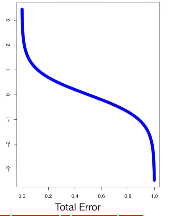



Now take another parameter and similarly calculate the weight of the stump in the final model. 


If a sample is incorrectly classified then , 


$$ New sample weight = Original Sample weight \times e^{weight of the last stump} $$

Now we also need to decrease the sample weights for the correctly classified samples

(why though, we need to emphasize on the errors made in the previous stump)

so basically the next stump will give more emphasis in correcting the incorrect sample than the others,if that works out then we continue, otherwise say a originally correct sample becomes incorrect then we repeat the process to increase its weight so that in the end almost all samples are corrected.

Decrease in weight for a correct sample in a subsequent tree is

$$ NewSampleWeight= OriginalSampleWeight × e^{(-1) weight of the last stump} $$


Obviously, you may ask, they are probability weights(as said earlier), should'nt they add upto 1??

Yes. They should, so you can guess what I'm about to say next, like every other statistical learning model, we normalize the weight set, (divide by the sum of values ) . 


How do we calculate the subsequent stumps based on the normalized weights.??


In theory we could use the weighted gini index for giving more emphasis to the incorrect sample in the stump for the subsequent stump so that the model accuracy would improve

But, there is an alternative and simpler method as well.

we create a new sample set(sort of bootstrapped data, but this is not random here, we have a system to create this new refined dataset)

How do we do this?(or should i say , how does the program do this?)

let us say we are in the $N^{th}$ row \\

If,

$$ \text{C[N-1]}\leq\text{Sample_Weight_{N}}\leq (\text{C[N-1]} + \text{Sample_Weight_{N}}) $$

We add the element to the new data-set, now the size of the new dataset is equal to the size of the old dataset. (MUST BE EQUAL TO)

Now pick a number ; a random number between 0 and 1, and add the sample to the new dataset based on the equation above. 

*Why does this work?*

We observe that, larger the sample weight, larger the range of cumulative sums it is going to cover, range is equal to the value of the sample weight itself.

Therefore when we have a very large dataset which is usually the case, the probability of selection of that particular sample will definintely be higher than the other samples, and since the selection is very random (with no sort of bias towards any data) it is very likely that the number with the higher sample weight will appear more in the new dataset which we have created.



In [ ]:
import pandas as pd
import numpy as np
import sklearn
data=pd.read_csv("apples_and_oranges.csv")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
data=pd.get_dummies(data)

In [ ]:
train_set,test_set=sklearn.model_selection.train_test_split(data,test_size=0.3,random_state=42)

In [ ]:
X_train = train_set.iloc[:,0:2].values
Y_train = train_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values



In [ ]:
adaboost = sklearn.ensemble.AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 42)

In [ ]:
adaboost.fit(X_train,Y_train)
from sklearn.metrics import mean_squared_error

In [ ]:
outputs=adaboost.predict(X_test)
outputs=np.array(outputs)
Y_test=np.array(Y_test)
#lets use the enumerate parameter 0 for apple 1 for orange sort of thing
rmse=mean_squared_error(outputs,Y_test)
print(rmse)

0.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,outputs)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print(f"the accuracy of the model here : {np.round(100*accuracy,2)}")

the accuracy of the model here : 100.0


In [ ]:
##NOTE: you can also use the pre-processor class in sklearn for label encoding, infact thats better and more specific, here it didnt matter what values I made numerical, 
##so i just went with pd.get_dummies that creates the binary encoding which we discussed during random forest. (Remember???)

###Similarities 
1. Both of them use randomly generated samples from the dataset
2. The final decision is made by averaging the results from all the learners or by Majority Voting amongst the learners
3. 


###Differences Between Bagging and Boosting


1.   In Bagging, each decision tree is built independently. Whereas in Boosting, the results of the preceding treee influence the making of the next one
2.   In Bagging Classifiers are trained parellely, whereas in boosting classifiers are trained sequentially. 
3. Each Model receives equal weight in bagging, however in boosting the weights are constantly adjusted and normalised based on the results of the previous model
4.  Bagging reduces variance , and thereby solving over-fitting of the model
In Boosting , the bias is  reduced. 